In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [ ]:
image_count = 500

In [ ]:
labels = np.empty(image_count *2)
labels[:image_count] = 0
labels[image_count:] = 1

In [ ]:
my_images = []
for i in range(image_count):
  ims = plt.imread('KalamitesTextures{}.png'.format(i+1))
  my_resized.append(np.expand_dims(ims[:,:,0], axis=-1))


for i in range(image_count2):
  ims = plt.imread('LakamitesTextures{}.png'.format(i+1))
  my_resized.append(np.expand_dims(ims[:,:,0], axis=-1))

In [ ]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(np.array(my_images), labels, test_size = 0.2, random_state = 0)

In [ ]:
values = []
val_values = []
n_kern = 12

In [ ]:
for j in range(5):
  predictions = []
  score_list = []
  for i in [2, 3, 4, 5, 6]:
      

      kernel_size = (i, i)
      print("\n\nThe iteration launches for the kernel size : ", kernel_size, "number of the kernels : ", n_kern)

      model = Sequential()

      #First Layer
      model.add(Conv2D(n_kern, kernel_size, activation='relu',padding="valid", kernel_initializer="random_uniform",input_shape=(180,180,1)))
      model.add(MaxPooling2D(pool_size = (2,2)))
    
      #Third Layer
      model.add(Flatten())
      model.add(Dense(units = 128,activation= 'relu'))
      model.add(Dropout(0.5))
        
      #Output Layer
      model.add(Dense(1))
      model.add(Activation("sigmoid"))
        
      model.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=["accuracy"])
      history = model.fit(train_images_resized, train_labels_resized, batch_size=1, epochs=8,validation_data=(test_images_resized,test_labels_resized))
    
      values.append(history.history["accuracy"])
      val_values.append(history.history["val_accuracy"])

In [ ]:
accuracy = np.array(values)
plot = []
for j in range(5):
  ploted = 0
  for i in range(5):
    ploted += accuracy[j+((i)*5)]
  plot.append(ploted/5)

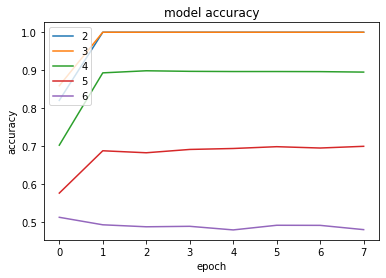

In [ ]:
plt.plot(plot[0])
plt.plot(plot[1])
plt.plot(plot[2])
plt.plot(plot[3])
plt.plot(plot[4])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['2', '3','4','5','6'], loc='upper left')
plt.savefig("accuracy.png")

In [ ]:
val_accuracy = np.array(val_values)
plot = []
for j in range(5):
  ploted = 0
  for i in range(5):
    ploted += val_accuracy[j+((i)*5)]
  plot.append(ploted/5)

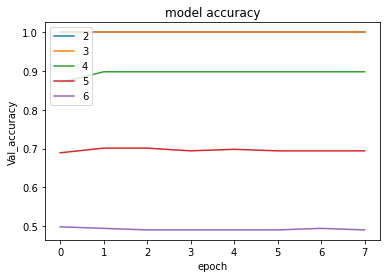

In [ ]:
plt.plot(plot[0])
plt.plot(plot[1])
plt.plot(plot[2])
plt.plot(plot[3])
plt.plot(plot[4])

plt.title('model accuracy')
plt.ylabel('Val_accuracy')
plt.xlabel('epoch')

plt.legend(['2', '3','4','5','6'], loc='upper left')
plt.savefig("val.png")

**KERNEL VISUALIZATION**

In [ ]:
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [ ]:
filters, biases= model.layers[0].get_weights()

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

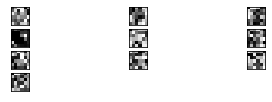

In [ ]:
# plot first few filters
n_filters, ix = 12, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j],cmap="binary")
		ix += 1
# show the figure
#pyplot.savefig("five_size_two.png")
pyplot.show()